## Section 1 — Dataset overview

In [52]:
import sys
from pathlib import Path

project_root = Path().resolve().parents[0]
sys.path.append(str(project_root))
import sys
sys.path[-1]
from src.data import get_train_test_data
import pandas as pd


In [15]:
X_train, X_test, y_train, y_test = get_train_test_data()


In [16]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (800, 20)
X_test shape: (200, 20)
y_train shape: (800,)
y_test shape: (200,)


In [20]:
pd.DataFrame({
    "feature": X_train.columns,
    "dtype": X_train.dtypes.values
})


,feature,dtype
0,checking_status,category
1,duration,int64
2,credit_history,category
3,purpose,category
4,credit_amount,int64
5,savings_status,category
6,employment,category
7,installment_commitment,int64
8,personal_status,category
9,other_parties,category


## Section 2 — Target variable

In [ ]:
y_train.head() # display first few target values (Each row corresponds to one person / one loan.)


828    1
997    0
148    0
735    0
130    0
Name: class, dtype: category
Categories (2, int64): [1, 0]

In [ ]:
y_train.value_counts() # display class distribution in training set
# around 70% good loans vs 30% bad loans

class
0    560
1    240
Name: count, dtype: int64

## Section 3 — Missing values

In [ ]:
X_train.isna().any().value_counts() # from this we assume there are no missing values in the training set

False    20
Name: count, dtype: int64

## Section 4 — Numeric features

In [53]:
from src.preprocessing import get_feature_types
numeric_features, _ = get_feature_types(X_train)
numeric_features


['duration',
 'credit_amount',
 'installment_commitment',
 'residence_since',
 'age',
 'existing_credits',
 'num_dependents']

In [54]:
X_train[numeric_features].describe().T

,count,mean,std,min,25%,50%,75%,max
duration,800.0,20.77000,11.817325,4.0,12.0,18.0,24.0,60.0
credit_amount,800.0,3189.59125,2673.547370,276.0,1353.0,2317.0,3933.0,15945.0
installment_commitment,800.0,2.94125,1.124446,1.0,2.0,3.0,4.0,4.0
residence_since,800.0,2.83000,1.111370,1.0,2.0,3.0,4.0,4.0
age,800.0,35.32375,11.045313,19.0,27.0,33.0,41.0,75.0
existing_credits,800.0,1.40750,0.567315,1.0,1.0,1.0,2.0,4.0
num_dependents,800.0,1.16000,0.366835,1.0,1.0,1.0,1.0,2.0


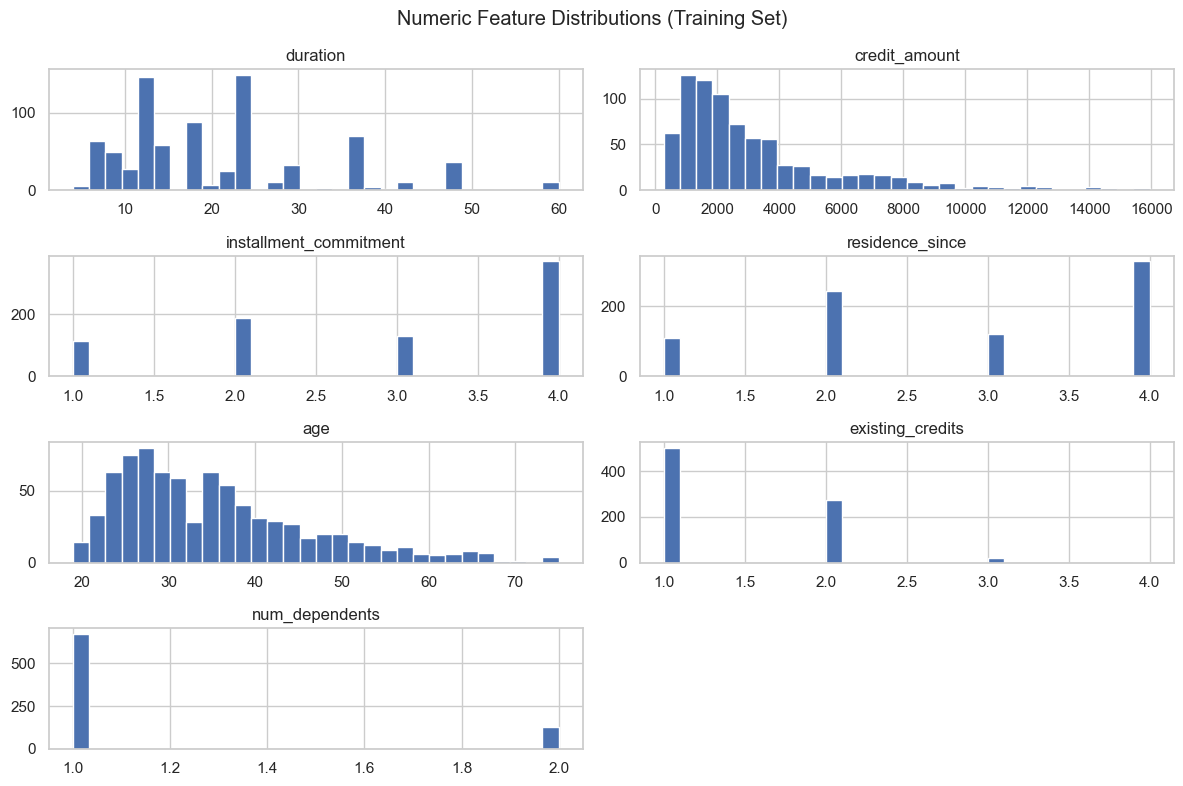

In [55]:
import matplotlib.pyplot as plt

X_train[numeric_features].hist(
    bins=30,
    figsize=(12, 8),
    layout=(len(numeric_features) // 2 + 1, 2),
)
plt.suptitle("Numeric Feature Distributions (Training Set)")
plt.tight_layout()
plt.show()


## Section 5 — Categorical Feature Analysis

In [58]:
_, categorical_features = get_feature_types(X_train)
categorical_features

['checking_status',
 'credit_history',
 'purpose',
 'savings_status',
 'employment',
 'personal_status',
 'other_parties',
 'property_magnitude',
 'other_payment_plans',
 'housing',
 'job',
 'own_telephone',
 'foreign_worker']

In [60]:
cardinality = X_train[categorical_features].nunique().sort_values(ascending=False)
cardinality


purpose                10
savings_status          5
credit_history          5
employment              5
checking_status         4
personal_status         4
property_magnitude      4
job                     4
other_parties           3
other_payment_plans     3
housing                 3
own_telephone           2
foreign_worker          2
dtype: int64

In [64]:
for feature in categorical_features:
    print(f"\n=== {feature} (percentage) ===")
    display(
        X_train[feature]
        .value_counts(normalize=True, dropna=False)
        .mul(100)
        .round(2)
        .rename("percentage")
        .to_frame()
    )



=== checking_status (percentage) ===


,percentage
checking_status,
no checking,39.50
<0,27.38
0<=X<200,26.75
>=200,6.38



=== credit_history (percentage) ===


,percentage
credit_history,
existing paid,52.00
critical/other existing credit,30.00
delayed previously,9.00
all paid,5.12
no credits/all paid,3.88



=== purpose (percentage) ===


,percentage
purpose,
radio/tv,26.88
new car,24.25
furniture/equipment,18.62
used car,10.50
business,9.88
education,5.00
repairs,2.25
domestic appliance,1.25
other,0.75



=== savings_status (percentage) ===


,percentage
savings_status,
<100,59.38
no known savings,18.00
100<=X<500,11.25
500<=X<1000,6.25
>=1000,5.12



=== employment (percentage) ===


,percentage
employment,
1<=X<4,33.88
>=7,25.75
<1,17.88
4<=X<7,17.38
unemployed,5.12



=== personal_status (percentage) ===


,percentage
personal_status,
male single,53.75
female div/dep/mar,31.13
male mar/wid,10.00
male div/sep,5.12



=== other_parties (percentage) ===


,percentage
other_parties,
none,91.12
guarantor,4.62
co applicant,4.25



=== property_magnitude (percentage) ===


,percentage
property_magnitude,
car,33.38
real estate,28.12
life insurance,23.00
no known property,15.50



=== other_payment_plans (percentage) ===


,percentage
other_payment_plans,
none,81.12
bank,14.00
stores,4.88



=== housing (percentage) ===


,percentage
housing,
own,71.25
rent,18.00
for free,10.75



=== job (percentage) ===


,percentage
job,
skilled,63.88
unskilled resident,19.75
high qualif/self emp/mgmt,14.37
unemp/unskilled non res,2.00



=== own_telephone (percentage) ===


,percentage
own_telephone,
none,59.38
yes,40.62



=== foreign_worker (percentage) ===


,percentage
foreign_worker,
yes,96.12
no,3.88
